In [46]:
import os
import pandas as pd
import numpy as np
import mygene
import gseapy as gp
import gseapy.plot as gseaplot
import matplotlib.pyplot as plt

from gseapy import enrichment_map
import networkx as nx

# %matplotlib inline
# %config InlineBackend.figure_format='retina' # mac
%load_ext autoreload
%autoreload 2
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

from gseapy import Biomart
bm = Biomart()

from gseapy import gseaplot, heatmap

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
def get_top_ranked_genes(DEG):
    '''
    This function takes a DEG file path and number of genes as input and returns a list of top-ranked genes 
    with their ranks based on the DEG file.
    '''
    # Read the DEG file and calculate rank
    Calu3_12h_DEGs = pd.read_csv(DEG, sep=',')
    Calu3_12h_DEGs['Rank'] = -np.log10(Calu3_12h_DEGs.padj)*Calu3_12h_DEGs.log2FoldChange
    
    Calu3_12h_DEGs = Calu3_12h_DEGs.sort_values('Rank', ascending=False).reset_index(drop=True)
    ranking = Calu3_12h_DEGs[['Unnamed: 0', 'Rank']]

    # Annotate gene symbols using mygene package
    mg = mygene.MyGeneInfo()
    geneSyms = mg.querymany(ranking['Unnamed: 0'], scopes='ensembl.gene')
    
    df = pd.DataFrame(geneSyms)  # Convert annotation of genes into readable format
    df = df.dropna(subset=['symbol'])  # Drop rows with unexpected gene symbol
    ranking['symbol'] = df['symbol']

    # Filter out any remaining rows with NaNs
    ranking = ranking.dropna(subset=['symbol'])
    # Return the top-ranked genes based on the input num_genes
    return  ranking[['symbol','Rank']]

In [48]:
def enrich_genes(top_ranked_genes):

    enr_Reactome_up = gp.enrichr(gene_list=top_ranked_genes,
                                 gene_sets=['Reactome_2022'],
                                 organism='Human', 
                                 cutoff=0.5)
    
    enr_GOBP_up = gp.enrichr(gene_list=top_ranked_genes,
                             gene_sets=['GO_Biological_Process_2021'],
                             organism='Human', 
                             cutoff=0.5)
    
    enr_GOMF_up = gp.enrichr(gene_list=top_ranked_genes ,
                             gene_sets=['GO_Molecular_Function_2021'],
                             organism='Human', 
                             cutoff=0.5)
    
    
    # Write results to CSV files
    #file_name = os.path.basename(file_path).split('.')[0]
    #enr_Reactome_up.results.to_csv(f'{file_name}_enr_Reactome.csv')
    
    return enr_Reactome_up.results, enr_GOBP_up.results, enr_GOMF_up.results

In [49]:
# get the enriched pathways from the datasets reactome, molecular function, biological process

In [50]:
directory = '/Users/sofialuk/Desktop/thesis/h1299/h1299_deseq/'

for file_name in os.listdir(directory):
    if '_DEGs_' in file_name and file_name.endswith('.csv'):
        print(file_name)

h1299_DEGs_36h.csv
h1299_DEGs_24h.csv
h1299_DEGs_12h.csv


In [51]:
directory = '/Users/sofialuk/Desktop/thesis/Calu3/calu3_deseq/'

for file_name in os.listdir(directory):
    if '_DEGs_' in file_name and file_name.endswith('.csv'):
        print(file_name)

Calu3_DEGs_12h.csv
Calu3_DEGs_12h_reactome.csv
Calu3_DEGs_8h.csv
Calu3_DEGs_4h.csv


In [52]:
directory = '/Users/sofialuk/Desktop/thesis/Calu3/calu3_deseq/'

for file_name in os.listdir(directory):
    if '_DEGs_' in file_name and "reactome" not in file_name and file_name.endswith('.csv'):
        file_path = os.path.join(directory, file_name)
        print(f'Processing {file_name}...')

        top_ranked_genes = get_top_ranked_genes(file_path)
        enr_reactome_up, enr_gobp_up, enr_gomf_up = enrich_genes(top_ranked_genes)

        # Create the filenames for the CSV files
        enr_reactome_up_file_name = file_name.split('.')[0] + '_enr_Reactome_up.csv'
        enr_gobp_up_file_name = file_name.split('.')[0] + '_enr_GOBP_up.csv'
        enr_gomf_up_file_name = file_name.split('.')[0] + '_enr_GOMF_up.csv'
        
        # Save the DataFrames as CSV files
        enr_reactome_up.to_csv(enr_reactome_up_file_name, index=False)
        enr_gobp_up.to_csv(enr_gobp_up_file_name, index=False)
        enr_gomf_up.to_csv(enr_gomf_up_file_name, index=False)

Processing Calu3_DEGs_12h.csv...
querying 1-1000...

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


done.
querying 1001-2000...done.
querying 2001-2378...done.
Finished.
3 input query terms found no hit:
	['ENSG00000112096', 'ENSG00000244693', 'ENSG00000168078']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_18635/3131966901.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


Processing Calu3_DEGs_8h.csv...
querying 1-1000...

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-3050...done.
Finished.
5 input query terms found no hit:
	['ENSG00000244693', 'ENSG00000225932', 'ENSG00000270672', 'ENSG00000271043', 'ENSG00000283486']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_18635/3131966901.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


Processing Calu3_DEGs_4h.csv...
querying 1-107...done.
Finished.


/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_18635/3131966901.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


In [53]:
directory = '/Users/sofialuk/Desktop/thesis/Calu3/calu3_deseq/'

# Define the function to preprocess each file
def preproc_df(filename):
    df = get_top_ranked_genes(filename)
    df = df.set_index('symbol')
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(subset=["Rank"], how="all", inplace=True)
    return df

In [54]:
# Loop through each CSV file in the directory and preprocess it
preprocessed_data = {}  # A dictionary to store the preprocessed data


for file_name in os.listdir(directory):
    if '_DEGs_' in file_name and 'reactome' not in file_name and file_name.endswith('.csv'):     
        file_path = os.path.join(directory, file_name)
        var_name = file_name.replace('.csv', '') + '_preprocessed'
        preprocessed_data[var_name] = preproc_df(file_path)

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


querying 1-1000...done.
querying 1001-2000...done.
querying 2001-2378...done.
Finished.
3 input query terms found no hit:
	['ENSG00000112096', 'ENSG00000244693', 'ENSG00000168078']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-1000...

/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_18635/3131966901.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']
/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-3050...done.
Finished.
5 input query terms found no hit:
	['ENSG00000244693', 'ENSG00000225932', 'ENSG00000270672', 'ENSG00000271043', 'ENSG00000283486']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-107...

/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_18635/3131966901.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


done.
Finished.


/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_18635/3131966901.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


In [55]:
preprocessed_data['Calu3_DEGs_12h_preprocessed'].head()

,Rank
symbol,
GBP4,1470.205576
OASL,1455.590569
IFIT3,1436.031813
MX2,1344.864084
SAMD9L,1170.577581


In [56]:
def prerank(df):
    pre_res = gp.prerank(rnk=df, # or rnk = rnk,
                         gene_sets='Reactome_2022',
                         threads=4,
                         min_size=5,
                         max_size=1000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=None, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )
    return pre_res

In [57]:
pre_res = prerank(preprocessed_data['Calu3_DEGs_12h_preprocessed'])
pre_res2 =  prerank(preprocessed_data['Calu3_DEGs_8h_preprocessed'])

2023-05-07 01:39:08,431 [INFO] Parsing data files for GSEA.............................
2023-05-07 01:39:08,431 [INFO] Enrichr library gene sets already downloaded in: /Users/sofialuk/.cache/gseapy, use local file
2023-05-07 01:39:08,456 [INFO] 0996 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-05-07 01:39:08,457 [INFO] 0822 gene_sets used for further statistical testing.....
2023-05-07 01:39:08,457 [INFO] Start to run GSEA...Might take a while..................
2023-05-07 01:39:10,775 [INFO] Congratulations. GSEApy runs successfully................

2023-05-07 01:39:10,779 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-05-07 01:39:10,780 [INFO] Parsing data files for GSEA.............................
2023-05-07 01:39:10,781 [INFO] Enrichr library gene sets already downloaded in: /Users/sofialuk/.cache/gseapy, use local file
2023-05-07 01:39:10,804 [INFO] 0918 gene_sets have been filtered out when max

In [27]:
pre_res = prerank(preprocessed_data["Calu3_DEGs_12h_preprocessed"]).res2d  # run prerank for each timepoint

nodes, edges = enrichment_map(pre_res, cutoff=0.7)

G = nx.from_pandas_edgelist(edges,
                                source='src_idx',
                                target='targ_idx',
                                edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])
    

2023-05-06 16:15:28,747 [INFO] Parsing data files for GSEA.............................
2023-05-06 16:15:28,748 [INFO] Enrichr library gene sets already downloaded in: /Users/sofialuk/.cache/gseapy, use local file
2023-05-06 16:15:28,787 [INFO] 0996 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-05-06 16:15:28,788 [INFO] 0822 gene_sets used for further statistical testing.....
2023-05-06 16:15:28,788 [INFO] Start to run GSEA...Might take a while..................
2023-05-06 16:15:31,146 [INFO] Congratulations. GSEApy runs successfully................



In [14]:
G.nodes(data=True)

NodeDataView({1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 8: {}, 9: {}})

In [44]:
G.nodes(data=True)

# 12 hpi misses nodes 0 and 7

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 5: {}, 8: {}, 9: {}, 6: {}, 7: {}})

In [29]:
G.add_node(nodes.index[0])
G.add_node(nodes.index[7])

In [35]:
nx.write_graphml(G,'/Users/sofialuk/Desktop/thesis/Calu3/calu3_GSEA/graph' )

In [33]:
! pwd

/Users/sofialuk/Desktop/thesis/Calu3/calu3_GSEA


2023-05-07 01:11:03,545 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-05-07 01:11:03,548 [INFO] Parsing data files for GSEA.............................
2023-05-07 01:11:03,548 [INFO] Enrichr library gene sets already downloaded in: /Users/sofialuk/.cache/gseapy, use local file
2023-05-07 01:11:03,581 [INFO] 0918 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-05-07 01:11:03,582 [INFO] 0900 gene_sets used for further statistical testing.....
2023-05-07 01:11:03,582 [INFO] Start to run GSEA...Might take a while..................
2023-05-07 01:11:06,968 [INFO] Congratulations. GSEApy runs successfully................

2023-05-07 01:11:07,016 [INFO] Parsing data files for GSEA.............................
2023-05-07 01:11:07,016 [INFO] Enrichr library gene sets already downloaded in: /Users/sofialuk/.cache/gseapy, use local file
2023-05-07 01:11:07,042 [INFO] 0996 gene_sets have been filtered out when max

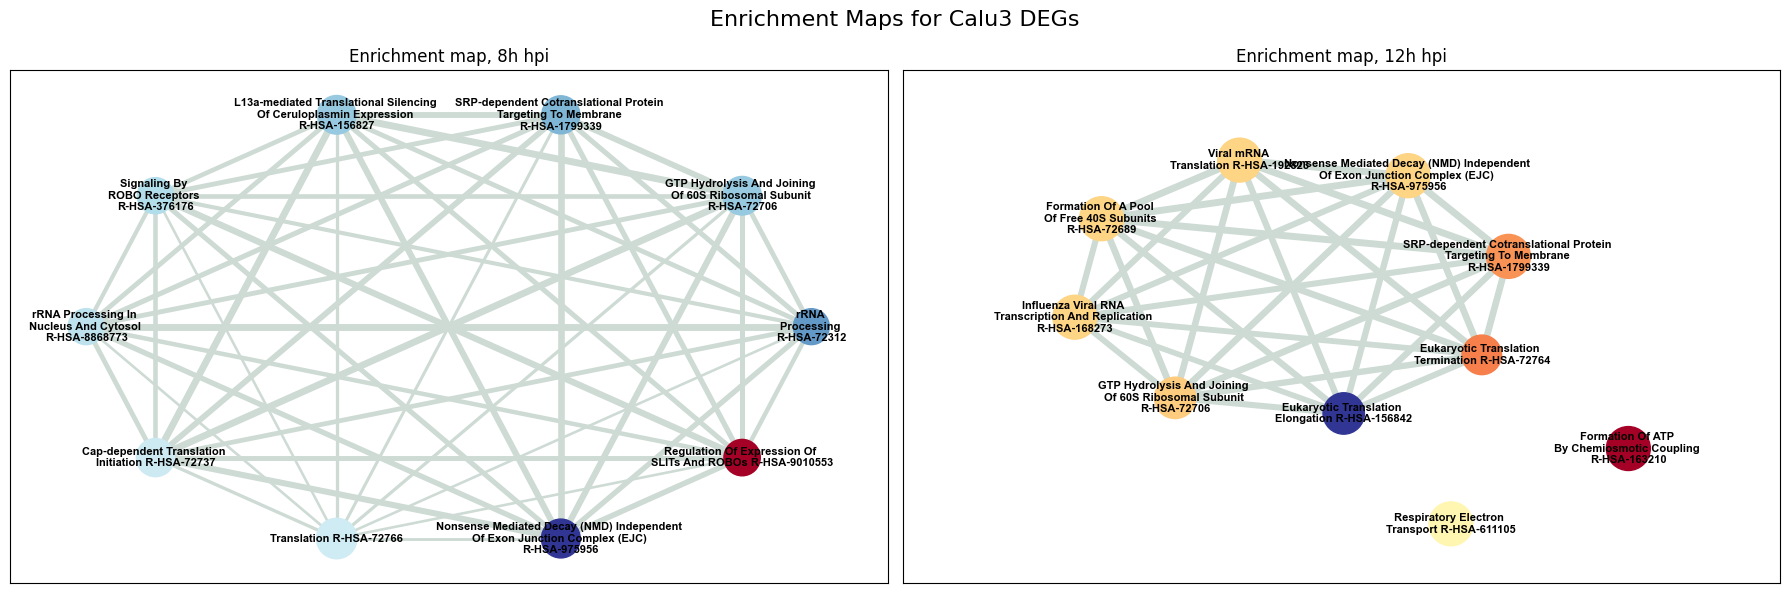

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # create a figure with 3 subplots

fig.suptitle('Enrichment Maps for Calu3 DEGs', fontsize=16)


for i, (timepoint, ax) in enumerate(zip(['Calu3_DEGs_8h_preprocessed', 'Calu3_DEGs_12h_preprocessed'], axs)):
    pre_res = prerank(preprocessed_data[timepoint]).res2d  # run prerank for each timepoint

    nodes, edges = enrichment_map(pre_res, cutoff=0.5)

    G = nx.from_pandas_edgelist(edges,
                                source='src_idx',
                                target='targ_idx',
                                edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

    G.add_node(nodes.index[0])
    G.add_node(nodes.index[7])

    
    # init node coordinates with modified spacing
    #pos = nx.layout.spring_layout(G, k=0.5, iterations=100, scale=2)

    pos = nx.kamada_kawai_layout(G)
    # set node size
    node_size = nodes.Hits_ratio * 1000
    # draw node
    nx.draw_networkx_nodes(G,
                           pos=pos,
                           cmap=plt.cm.RdYlBu,
                           node_color=list(nodes.NES),
                           node_size=node_size,
                           ax=ax)
    # split node label into multiple lines
    labels_dict = {}
    for k, v in nodes.Term.items():
        words = v.split(' ')
        n_words = len(words)
        if n_words <= 2:
            label = v
        else:
            label = ''
            for i, word in enumerate(words):
                if i != 0 and i % (n_words // 2) == 0:
                    label += '\n'
                label += word + ' '
        labels_dict[k] = label.strip()
    # draw node label
    nx.draw_networkx_labels(G,
                            pos=pos,
                            labels=labels_dict,
                            font_size=8,
                            font_weight='bold',
                            font_family='Arial',
                            verticalalignment='center',
                            horizontalalignment='center',
                            ax=ax)
    # draw edge
    edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
    nx.draw_networkx_edges(G,
                           pos=pos,
                           width=list(map(lambda x: x*5, edge_weight)),
                           edge_color='#CDDBD4',
                           ax=ax)
    # set subplot title
    ax.set_title(f"{timepoint.split('_')[2]} hpi")

# set figure borders
plt.xlim(-1.3, 1.3)
plt.ylim(-1.3, 1.3)
plt.tight_layout()

# save figure
plt.savefig('calu3_enrichment_maps.png', dpi=300)
plt.show()


2023-05-07 01:41:55,339 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-05-07 01:41:55,342 [INFO] Parsing data files for GSEA.............................
2023-05-07 01:41:55,342 [INFO] Enrichr library gene sets already downloaded in: /Users/sofialuk/.cache/gseapy, use local file
2023-05-07 01:41:55,375 [INFO] 0918 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-05-07 01:41:55,376 [INFO] 0900 gene_sets used for further statistical testing.....
2023-05-07 01:41:55,376 [INFO] Start to run GSEA...Might take a while..................
2023-05-07 01:41:58,554 [INFO] Congratulations. GSEApy runs successfully................

2023-05-07 01:41:58,583 [INFO] Parsing data files for GSEA.............................
2023-05-07 01:41:58,583 [INFO] Enrichr library gene sets already downloaded in: /Users/sofialuk/.cache/gseapy, use local file
2023-05-07 01:41:58,609 [INFO] 0996 gene_sets have been filtered out when max

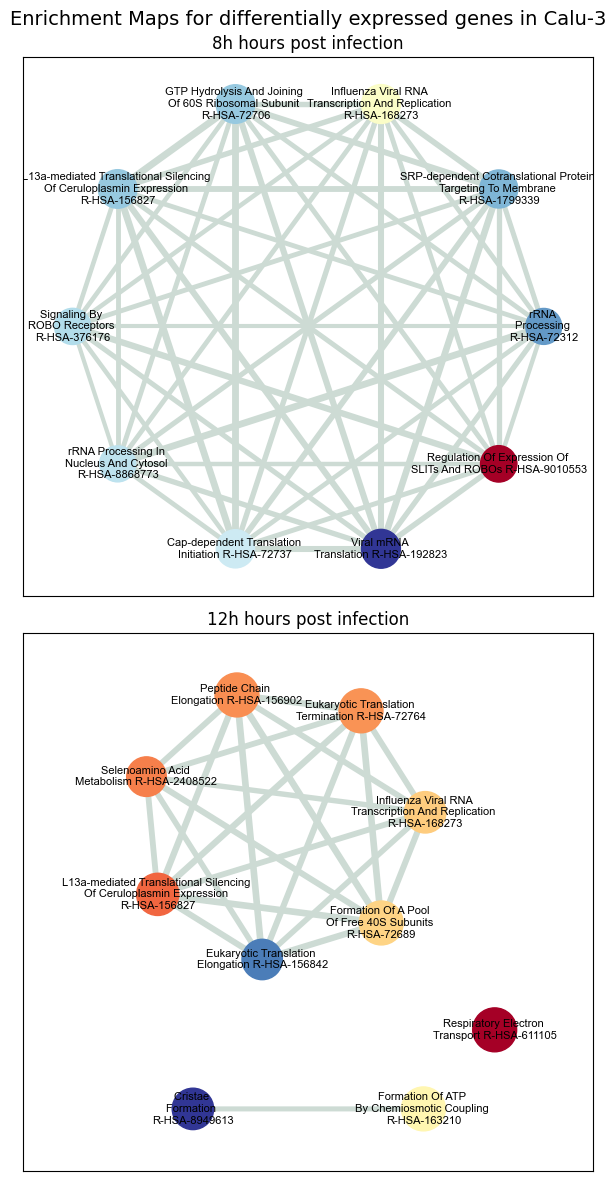

In [61]:
fig, axs = plt.subplots(2, 1, figsize=(6, 12))  # create a figure with 2 subplots

fig.suptitle('Enrichment Maps for differentially expressed genes in Calu-3', fontsize=14)


for i, (timepoint, ax) in enumerate(zip(['Calu3_DEGs_8h_preprocessed', 'Calu3_DEGs_12h_preprocessed'], axs)):
    pre_res = prerank(preprocessed_data[timepoint]).res2d  # run prerank for each timepoint

    nodes, edges = enrichment_map(pre_res, cutoff=0.5)

    G = nx.from_pandas_edgelist(edges,
                                source='src_idx',
                                target='targ_idx',
                                edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

    G.add_node(nodes.index[0])
    G.add_node(nodes.index[7])
    G.add_node(nodes.index[4])


    pos = nx.kamada_kawai_layout(G)
    # set node size
    node_size = nodes.Hits_ratio * 1000
    # draw node
    nx.draw_networkx_nodes(G,
                           pos=pos,
                           cmap=plt.cm.RdYlBu,
                           node_color=list(nodes.NES),
                           node_size=node_size,
                           ax=ax)
    # split node label into multiple lines
    labels_dict = {}
    for k, v in nodes.Term.items():
        words = v.split(' ')
        n_words = len(words)
        if n_words <= 2:
            label = v
        else:
            label = ''
            for i, word in enumerate(words):
                if i != 0 and i % (n_words // 2) == 0:
                    label += '\n'
                label += word + ' '
        labels_dict[k] = label.strip()
    # draw node label
    nx.draw_networkx_labels(G,
                            pos=pos,
                            labels=labels_dict,
                            font_size=8,
                            #font_weight='bold',
                            font_family='Arial',
                            verticalalignment='center',
                            horizontalalignment='center',
                            ax=ax)
    # draw edge
    edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
    nx.draw_networkx_edges(G,
                           pos=pos,
                           width=list(map(lambda x: x*5, edge_weight)),
                           edge_color='#CDDBD4',
                           ax=ax)
    # set subplot title
    ax.set_title(f"{timepoint.split('_')[2]} hours post infection")

# set figure borders
plt.xlim(-1.3, 1.3)
plt.ylim(-1.3, 1.3)
plt.tight_layout()

# save figure
plt.savefig('calu3_enrichment_maps.png', dpi=300)
plt.show()